In [20]:
import pandas as pd
import seaborn as sns
import eda_util
import matplotlib.pyplot as plt


In [4]:
RANDOM_STATE = 64
TARGET = 'delivery_time'

# Loading data

In [5]:
train_csv = pd.read_csv('datasets/train.csv', index_col=0)
test_csv = pd.read_csv('datasets/test.csv', index_col=0)
display(train_csv.head())
display(test_csv.head())

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_hours,delivery_time
106702,4.0,2015-02-04 22:44:19,2015-02-04 23:16:17,6717,dessert,5.0,6,4770,5,795,795,9.0,12.0,15.0,251,407.0,22,1918.0
59877,4.0,2015-01-28 05:05:05,2015-01-28 06:11:26,2119,turkish,3.0,2,2098,2,999,1099,27.0,27.0,30.0,251,817.0,5,3981.0
88918,2.0,2015-01-24 00:51:19,2015-01-24 01:39:37,6563,steak,5.0,5,3696,4,0,1399,39.0,27.0,28.0,251,530.0,0,2898.0
112561,2.0,2015-02-18 03:29:26,2015-02-18 04:05:53,6821,sandwich,5.0,3,2147,2,235,679,99.0,64.0,108.0,251,834.0,3,2187.0
161617,1.0,2015-02-11 01:51:20,2015-02-11 03:07:53,400,japanese,1.0,1,3800,1,3800,3800,40.0,40.0,45.0,446,534.0,1,4593.0


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_hours,delivery_time
119152,4.0,2015-01-25 19:45:36,2015-01-25 20:07:18,3597,american,3.0,4,2140,4,275,1125,47.0,92.0,38.0,251,169.0,19,1302.0
10465,4.0,2015-02-13 19:06:41,2015-02-13 19:49:10,2664,dessert,3.0,2,1370,2,475,895,9.0,2.0,3.0,251,748.0,19,2549.0
95349,3.0,2015-01-25 02:27:17,2015-01-25 03:33:46,808,american,1.0,3,1767,3,199,749,24.0,24.0,26.0,446,784.0,2,3989.0
178586,4.0,2015-02-11 02:23:12,2015-02-11 03:22:30,5341,vietnamese,5.0,2,1275,2,300,875,82.0,75.0,119.0,251,938.0,2,3558.0
169841,4.0,2015-02-11 02:16:46,2015-02-11 02:56:33,3251,indian,2.0,10,1461,7,0,399,NaN,NaN,NaN,251,386.0,2,2387.0


In [6]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177678 entries, 106702 to 39366
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     176792 non-null  float64
 1   created_at                                    177678 non-null  object 
 2   actual_delivery_time                          177678 non-null  object 
 3   store_id                                      177678 non-null  int64  
 4   store_primary_category                        173394 non-null  object 
 5   order_protocol                                176765 non-null  float64
 6   total_items                                   177678 non-null  int64  
 7   subtotal                                      177678 non-null  int64  
 8   num_distinct_items                            177678 non-null  int64  
 9   min_item_price                                177

In [7]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19743 entries, 119152 to 67878
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     19642 non-null  float64
 1   created_at                                    19743 non-null  object 
 2   actual_delivery_time                          19743 non-null  object 
 3   store_id                                      19743 non-null  int64  
 4   store_primary_category                        19267 non-null  object 
 5   order_protocol                                19661 non-null  float64
 6   total_items                                   19743 non-null  int64  
 7   subtotal                                      19743 non-null  int64  
 8   num_distinct_items                            19743 non-null  int64  
 9   min_item_price                                19743 non-null 

In [8]:
train_info = eda_util.data_summary(train_csv)

Potential numerical features are: ['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'created_hours', 'delivery_time']
No potential categorical feature
Miscellenous features are: ['created_at', 'actual_delivery_time', 'store_primary_category']
Columns with missing values are: ['market_id', 'store_primary_category', 'order_protocol', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']


In [11]:
display(train_info['na_count'])

,na_values_count
market_id,886
store_primary_category,4284
order_protocol,913
total_onshift_dashers,14655
total_busy_dashers,14655
total_outstanding_orders,14655
estimated_store_to_consumer_driving_duration,471


## Datetime columns

In [12]:
dtc = eda_util.ColumnTransformers.DatatimeConverter(columns=['created_at', 'actual_delivery_time'], format='%Y-%m-%d %H:%M:%S')
train_csv = dtc.fit_transform(train_csv)
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177678 entries, 106702 to 39366
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     176792 non-null  float64       
 1   created_at                                    177678 non-null  datetime64[ns]
 2   actual_delivery_time                          177678 non-null  datetime64[ns]
 3   store_id                                      177678 non-null  int64         
 4   store_primary_category                        173394 non-null  object        
 5   order_protocol                                176765 non-null  float64       
 6   total_items                                   177678 non-null  int64         
 7   subtotal                                      177678 non-null  int64         
 8   num_distinct_items                            177678 no

# Data Visualization

## Training set

In [15]:
train_plot_df = train_csv.copy()

# to int: market_id, order_protocol
float_to_int = ['market_id', 'order_protocol']

# to float: subtotal, min_item_price, max_item_price, estimated_order_place_duration
int_to_float = ['subtotal', 'min_item_price', 'max_item_price', 'estimated_order_place_duration']

ifc = eda_util.ColumnTransformers.IntFloatConverter(int_to_float=int_to_float, float_to_int=float_to_int)
train_plot_df = ifc.fit_transform(train_plot_df)
train_plot_df.info()

#drop created_at, actual_delivery_time

train_plot_df = train_plot_df.drop(['created_at', 'actual_delivery_time'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 177678 entries, 106702 to 39366
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     176792 non-null  Int64         
 1   created_at                                    177678 non-null  datetime64[ns]
 2   actual_delivery_time                          177678 non-null  datetime64[ns]
 3   store_id                                      177678 non-null  int64         
 4   store_primary_category                        173394 non-null  object        
 5   order_protocol                                176765 non-null  Int64         
 6   total_items                                   177678 non-null  int64         
 7   subtotal                                      177678 non-null  float64       
 8   num_distinct_items                            177678 no

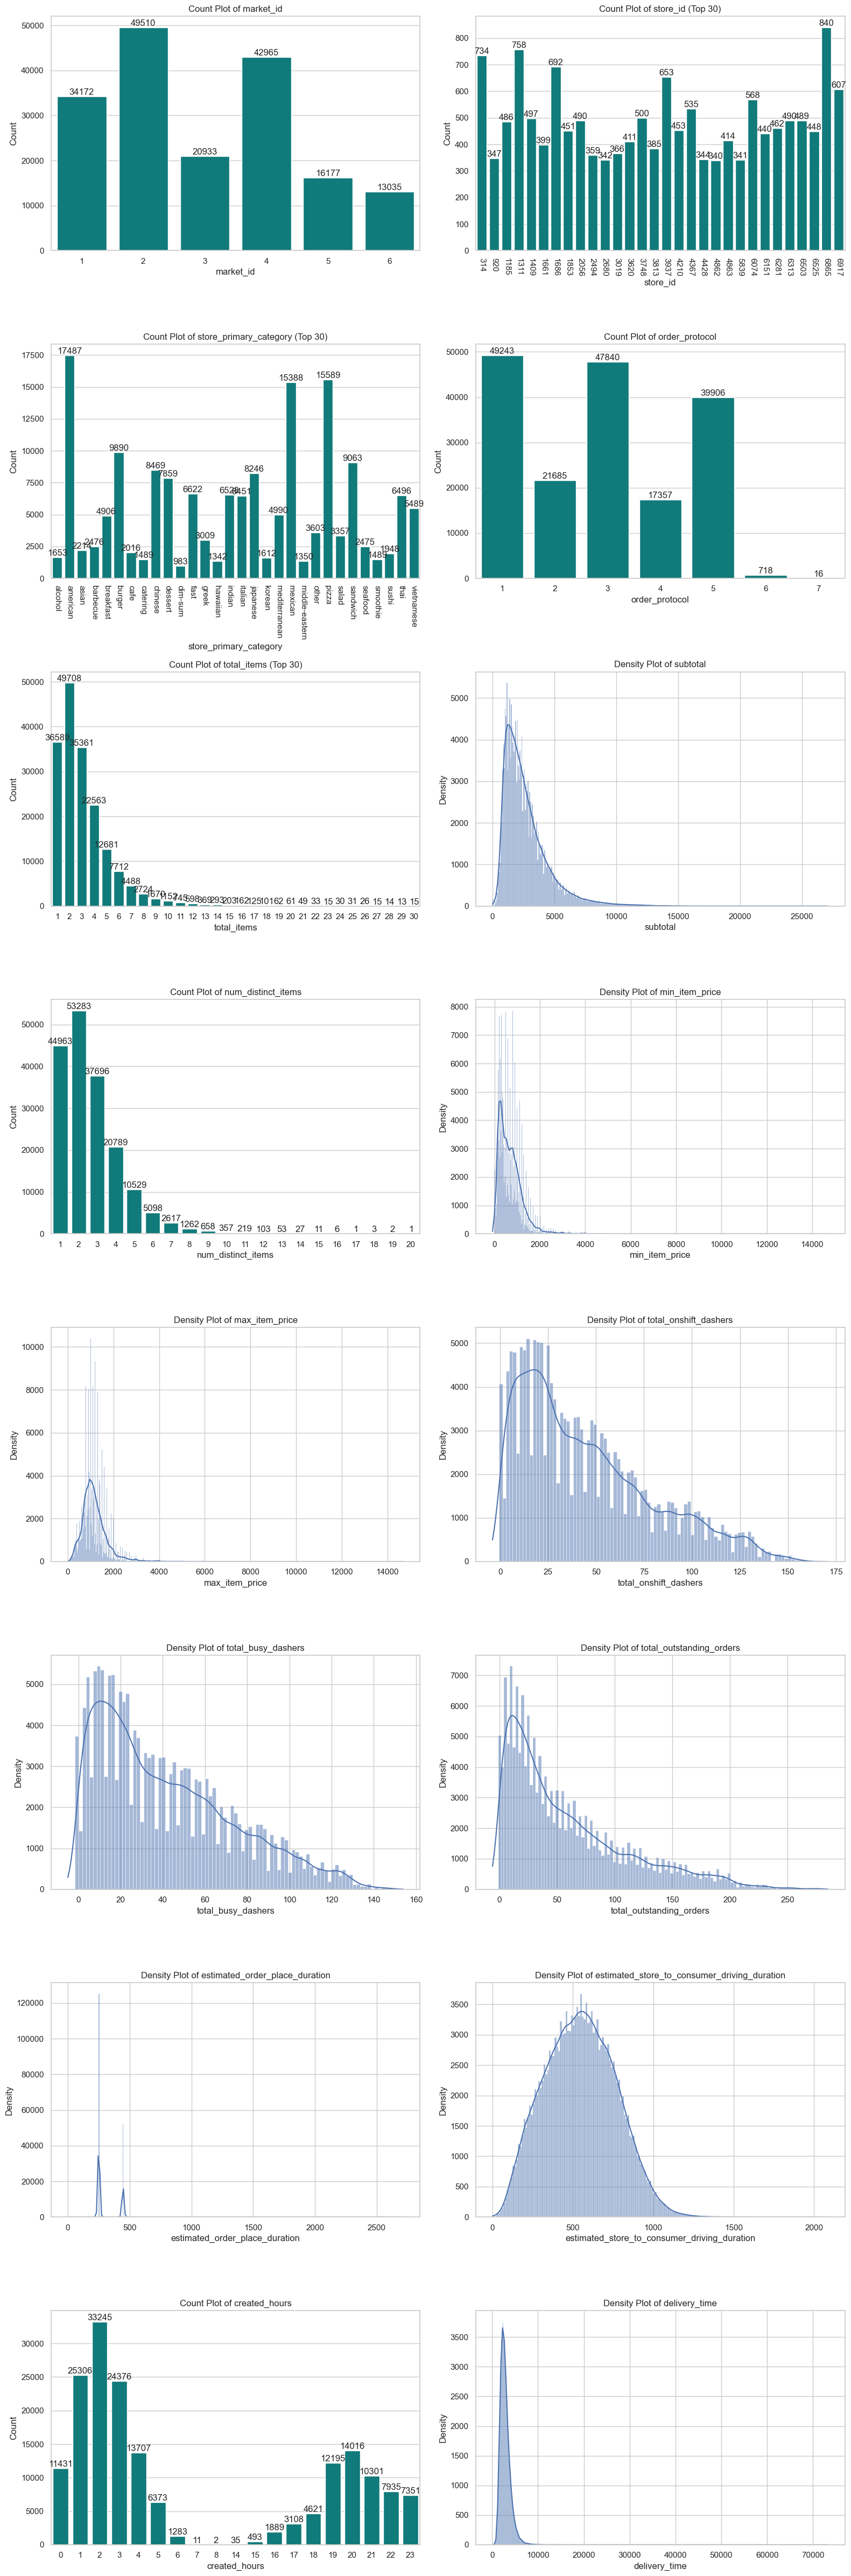

In [16]:
eda_util.Plots.distribution_plots(train_plot_df, rotate=['store_id', 'store_primary_category'])

Text(0.5, 1.0, 'Delivery time distribution (in seconds)')

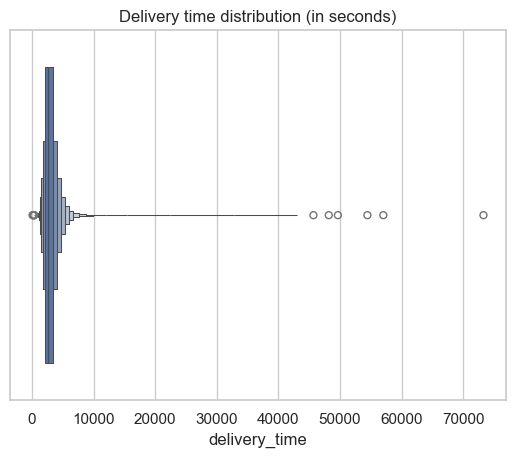

In [17]:
sns.boxenplot(train_plot_df[TARGET], orient='h').set_title('Delivery time distribution (in seconds)')

In [18]:
train_csv.groupby(by='created_hours')['delivery_time'].describe().round().astype(int)

,count,mean,std,min,25%,50%,75%,max
created_hours,,,,,,,,
0,11431,2652,1045,325,1985,2460,3080,22912
1,25306,2934,1079,386,2229,2754,3433,24881
2,33245,3288,1295,406,2512,3073,3814,73282
3,24376,3155,1158,575,2360,2947,3717,17862
4,13707,2675,1157,321,1942,2462,3167,45685
5,6373,2413,1144,352,1747,2204,2827,49659
6,1283,2440,927,563,1794,2256,2912,6898
7,11,2755,715,1599,2208,2918,3170,3856
8,2,30484,3119,28279,29382,30484,31587,32690


Text(0.5, 1.0, 'Median delivery_time per created hours (without hour 8)')

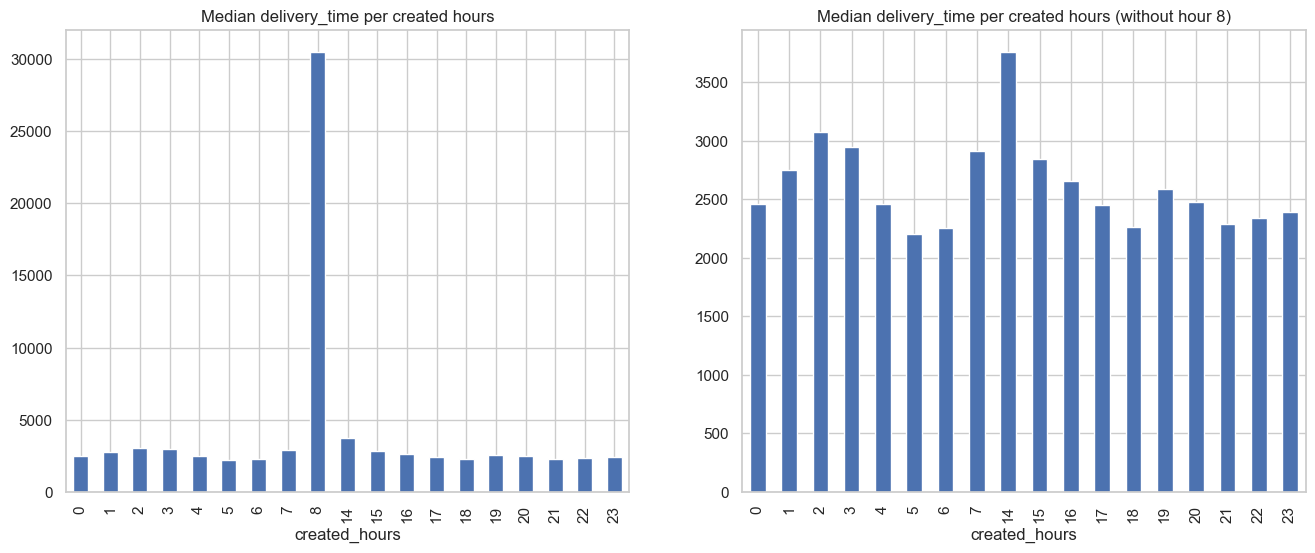

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
median_delivery_time = train_csv.groupby(by='created_hours')['delivery_time'].median() 
median_delivery_time.plot(kind='bar', ax=axes[0]).set_title('Median delivery_time per created hours') 
median_delivery_time.drop(8).plot(kind='bar', ax=axes[1]).set_title('Median delivery_time per created hours (without hour 8)') # Hour 0800 only has 2 entries with extreme values

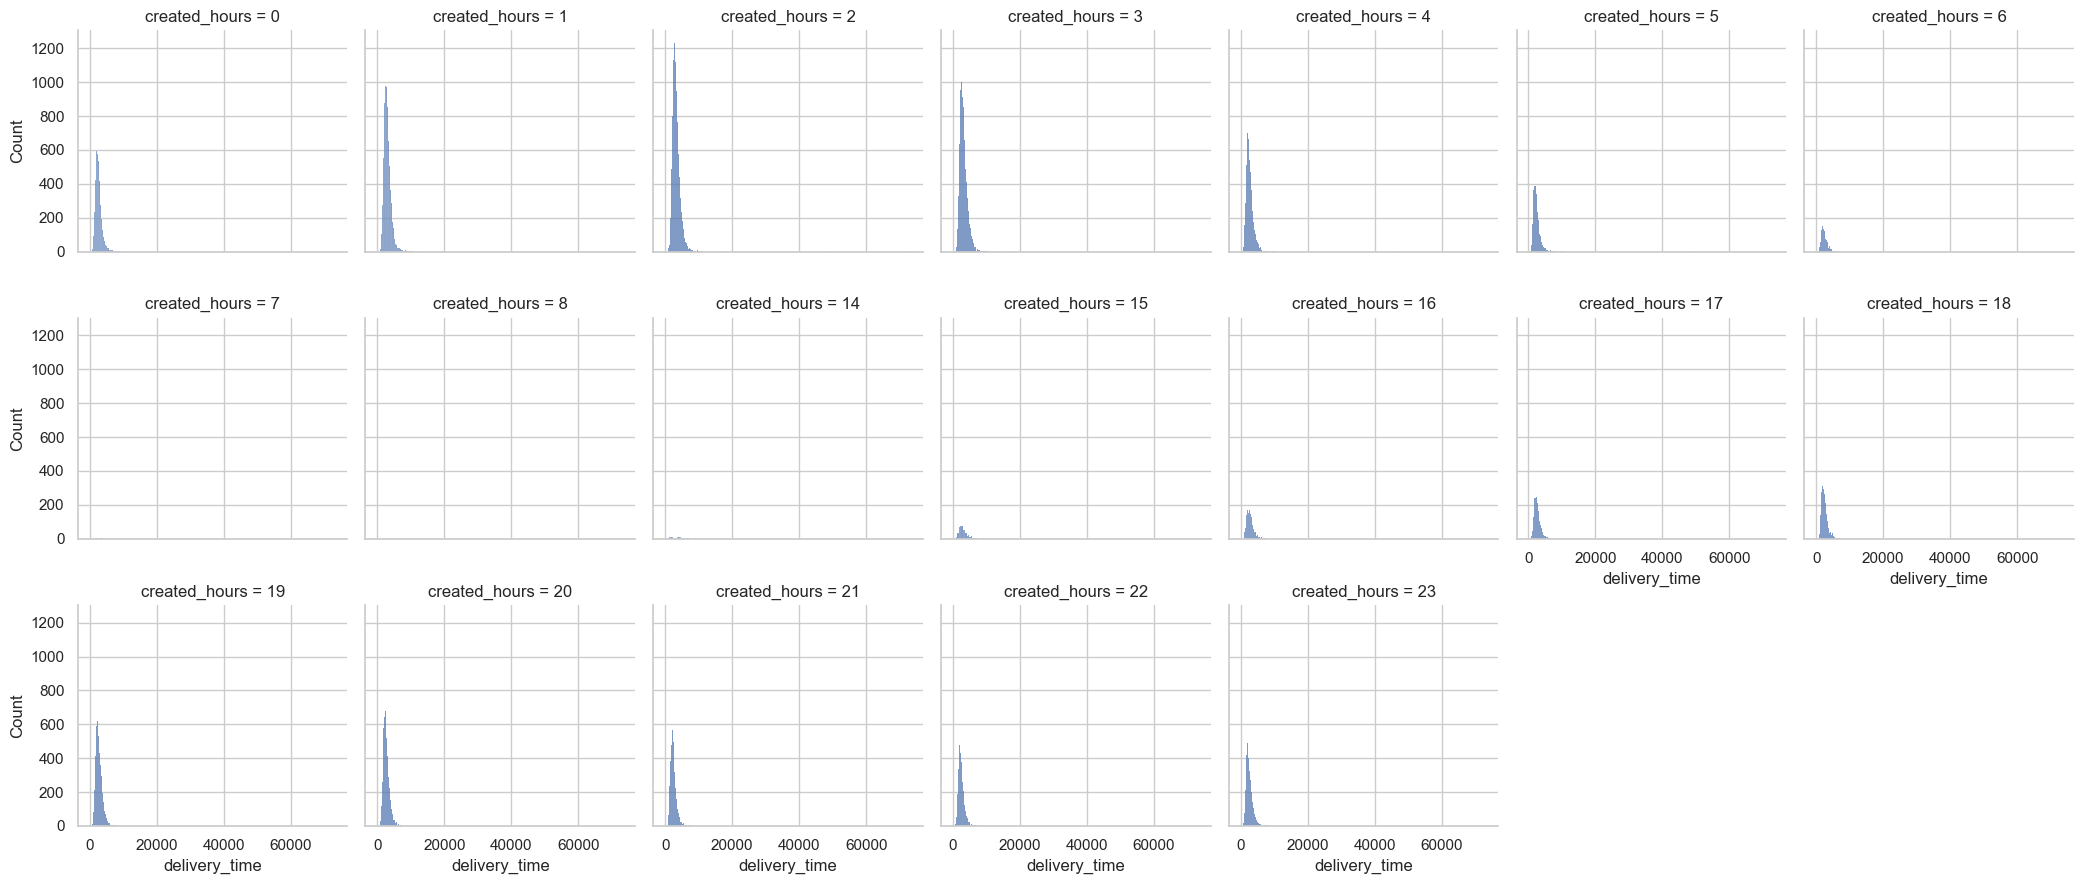

In [34]:
# Distribution of delivery time grouped by `created_hours`

g = sns.FacetGrid(train_plot_df[['created_hours', 'delivery_time']], col='created_hours', col_wrap=7)
g.map(sns.histplot, 'delivery_time')

## Test set

In [35]:
test_csv = dtc.fit_transform(test_csv)
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19743 entries, 119152 to 67878
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   market_id                                     19642 non-null  float64       
 1   created_at                                    19743 non-null  datetime64[ns]
 2   actual_delivery_time                          19743 non-null  datetime64[ns]
 3   store_id                                      19743 non-null  int64         
 4   store_primary_category                        19267 non-null  object        
 5   order_protocol                                19661 non-null  float64       
 6   total_items                                   19743 non-null  int64         
 7   subtotal                                      19743 non-null  int64         
 8   num_distinct_items                            19743 non-null  int6

In [36]:
test_plot_df = test_csv.copy()

# to int: market_id, order_protocol
float_to_int = ['market_id', 'order_protocol']

#to float: subtotal, min_item_price, max_item_price, estimated_order_place_duration
int_to_float = ['subtotal', 'min_item_price', 'max_item_price', 'estimated_order_place_duration']

ifc = eda_util.ColumnTransformers.IntFloatConverter(int_to_float=int_to_float, float_to_int=float_to_int)
test_plot_df = ifc.fit_transform(test_plot_df)
test_plot_df.info()

#drop created_at, actual_delivery_time

test_plot_df = test_plot_df.drop(['created_at', 'actual_delivery_time'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 19743 entries, 119152 to 67878
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   market_id                                     19642 non-null  Int64         
 1   created_at                                    19743 non-null  datetime64[ns]
 2   actual_delivery_time                          19743 non-null  datetime64[ns]
 3   store_id                                      19743 non-null  int64         
 4   store_primary_category                        19267 non-null  object        
 5   order_protocol                                19661 non-null  Int64         
 6   total_items                                   19743 non-null  int64         
 7   subtotal                                      19743 non-null  float64       
 8   num_distinct_items                            19743 non-null  int6

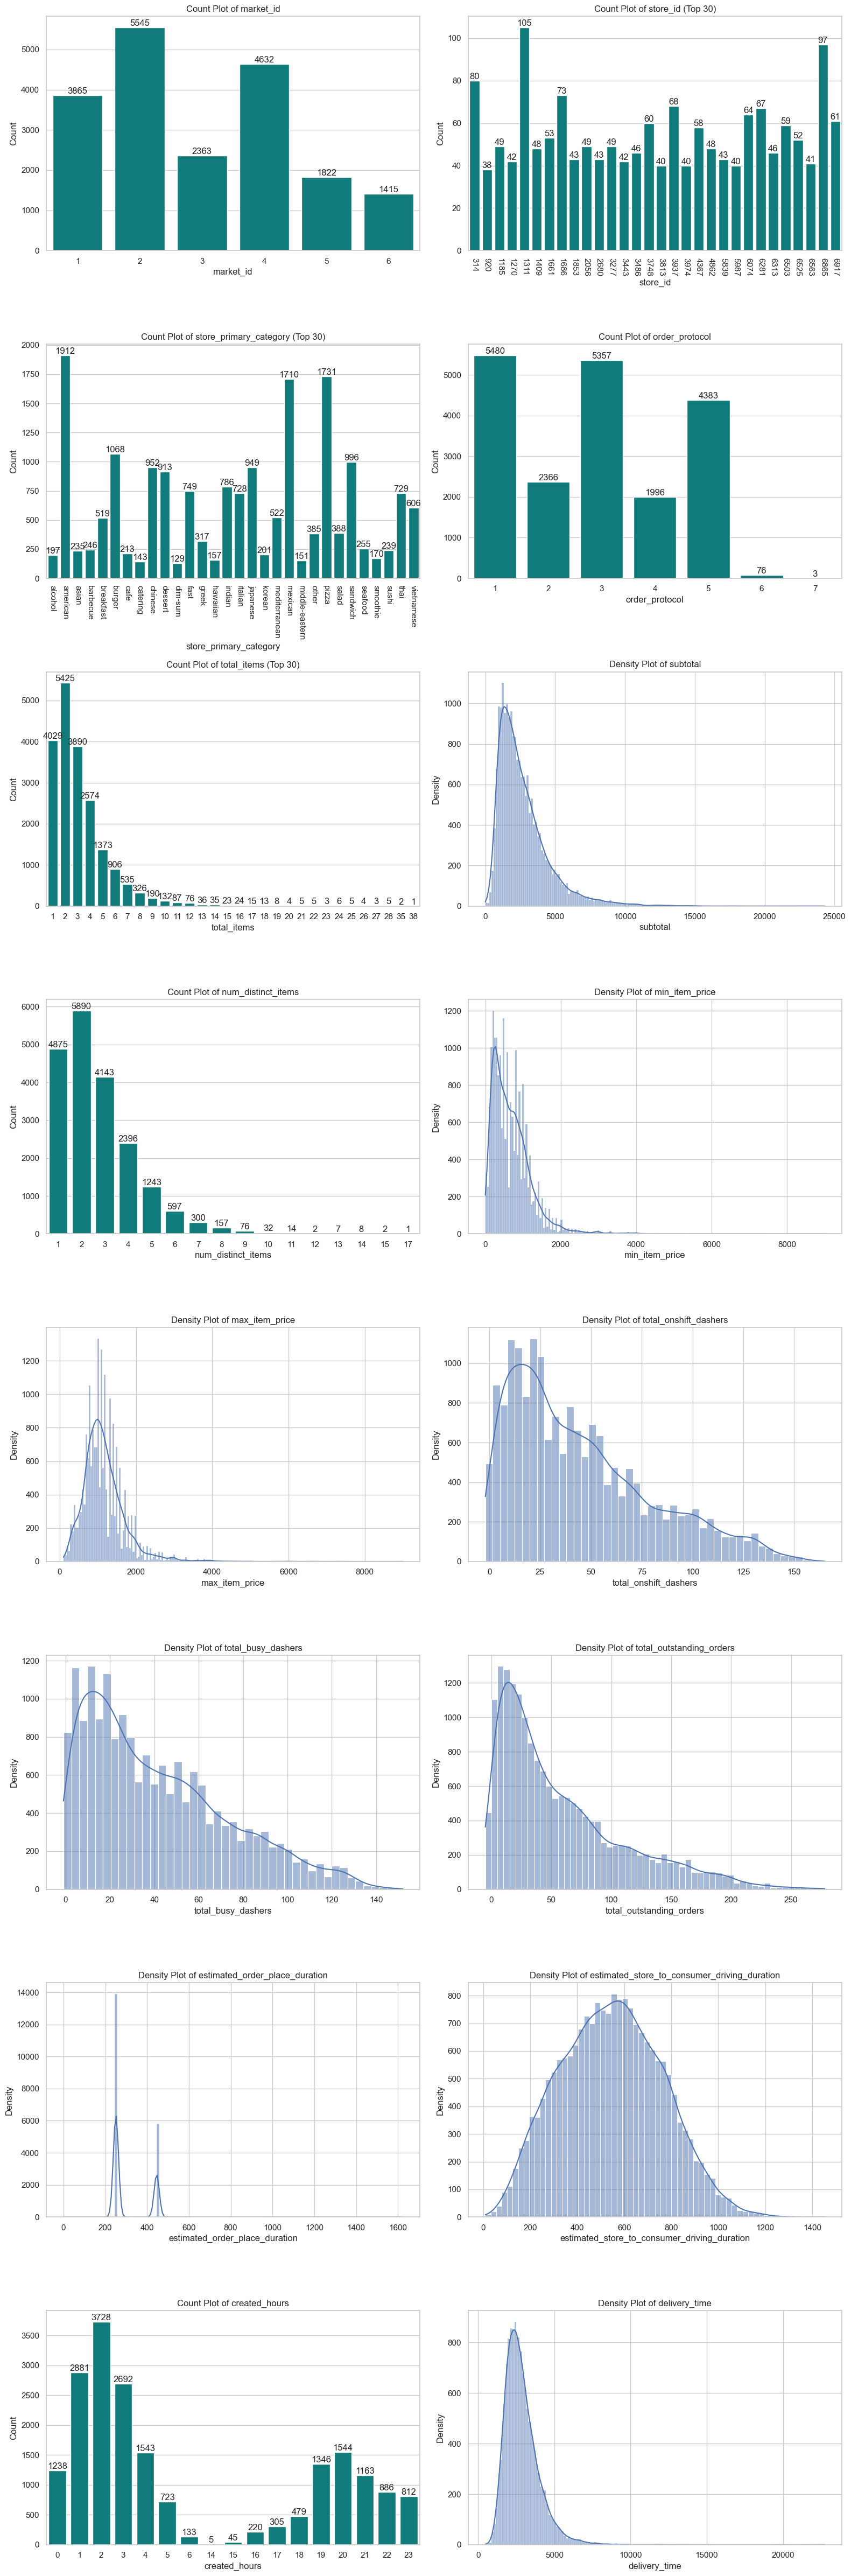

In [38]:
eda_util.Plots.distribution_plots(test_plot_df, rotate=['store_id', 'store_primary_category'])

Text(0.5, 1.0, 'Delivery time distribution (in seconds)')

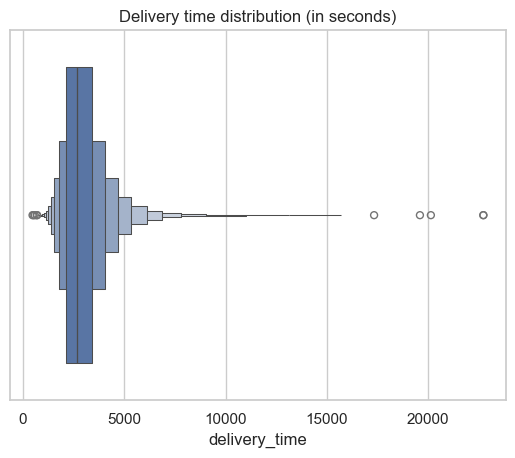

In [39]:
sns.boxenplot(test_plot_df[TARGET], orient='h').set_title('Delivery time distribution (in seconds)')

In [40]:
test_csv.groupby(by='created_hours')['delivery_time'].describe().round().astype(int)

,count,mean,std,min,25%,50%,75%,max
created_hours,,,,,,,,
0,1238,2614,998,894,1956,2438,3088,15355
1,2881,2953,1135,470,2217,2767,3455,22727
2,3728,3334,1238,1155,2525,3074,3908,17336
3,2692,3142,1172,917,2326,2930,3696,12476
4,1543,2690,1059,581,1970,2465,3216,11907
5,723,2382,987,808,1714,2167,2805,8780
6,133,2494,962,697,1886,2407,2936,7264
14,5,3957,1988,2327,2953,3418,3696,7389
15,45,3047,1300,1322,2125,2934,3711,7864


Text(0.5, 1.0, 'Median delivery_time per created hours')

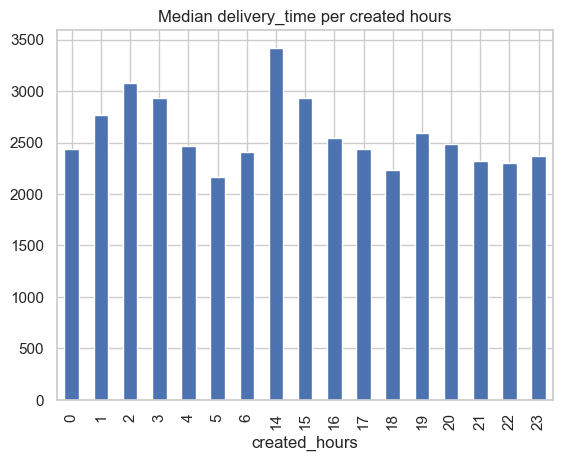

In [43]:
median_delivery_time = test_csv.groupby(by='created_hours')['delivery_time'].median() 
median_delivery_time.plot(kind='bar').set_title('Median delivery_time per created hours') 

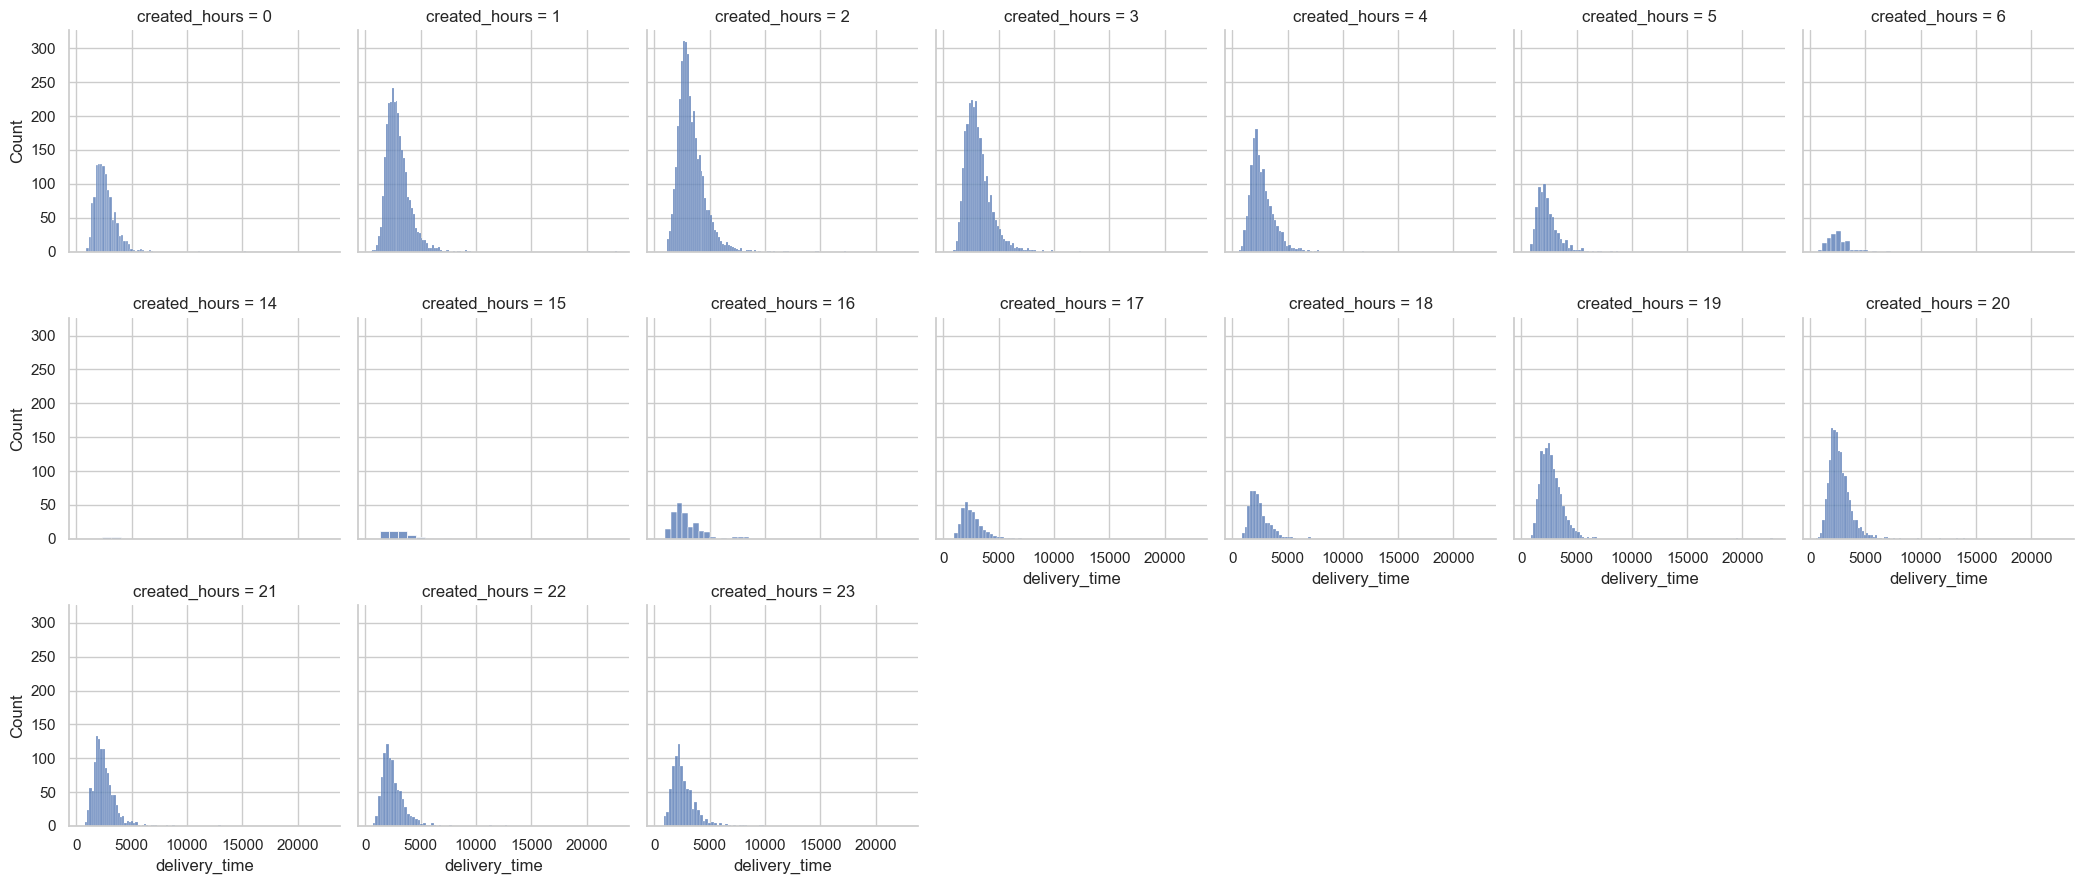

In [44]:
g = sns.FacetGrid(test_plot_df[['created_hours', 'delivery_time']], col='created_hours', col_wrap=7)
g.map(sns.histplot, 'delivery_time')